In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [55]:
df = pd.read_csv("C:/program1/class/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [56]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [57]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 'class' 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['quality'] = label.fit_transform(df['quality'])

df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,3
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,2


In [58]:
X=df.drop(['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'quality'], axis=1)
# class 컬럼 삭제하여 X에 저장, axis=1 이면 y축 기준
X.head()
# head()는 첫 5행만 출력함.

,fixed acidity,citric acid,density,sulphates,alcohol
0,7.4,0.00,0.9978,0.56,9.4
1,7.8,0.00,0.9968,0.68,9.8
2,7.8,0.04,0.9970,0.65,9.8
3,11.2,0.56,0.9980,0.58,9.8
4,7.4,0.00,0.9978,0.56,9.4


In [59]:
y=df['quality']
y.value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,fixed acidity,citric acid,density,sulphates,alcohol
642,9.9,0.45,0.99910,0.62,9.4
679,10.8,0.45,0.99720,0.54,9.6
473,9.9,0.55,0.99710,0.79,10.6
390,5.6,0.05,0.99240,0.82,12.9
1096,6.6,0.09,0.99655,0.49,10.8
...,...,...,...,...,...
763,9.3,0.26,0.99738,0.42,9.6
835,7.6,0.10,0.99655,0.51,9.3
1216,7.9,0.31,0.99677,0.69,9.5
559,13.0,0.49,1.00210,0.68,12.7


In [61]:
#one hot encoding 

y = pd.get_dummies(y).values
y

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0]], dtype=uint8)

In [62]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,fixed acidity,citric acid,density,sulphates,alcohol
140,8.4,0.11,0.99650,0.82,9.6
1232,7.6,0.29,0.99718,0.64,9.5
720,8.4,0.04,0.99760,0.44,9.6
77,6.8,0.00,0.99660,0.55,10.7
39,7.3,0.36,0.99780,0.83,10.5
...,...,...,...,...,...
763,9.3,0.26,0.99738,0.42,9.6
835,7.6,0.10,0.99655,0.51,9.3
1216,7.9,0.31,0.99677,0.69,9.5
559,13.0,0.49,1.00210,0.68,12.7


In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,fixed acidity,citric acid,density,sulphates,alcohol
140,8.4,0.11,0.99650,0.82,9.6
1232,7.6,0.29,0.99718,0.64,9.5
720,8.4,0.04,0.99760,0.44,9.6
77,6.8,0.00,0.99660,0.55,10.7
39,7.3,0.36,0.99780,0.83,10.5
...,...,...,...,...,...
763,9.3,0.26,0.99738,0.42,9.6
835,7.6,0.10,0.99655,0.51,9.3
1216,7.9,0.31,0.99677,0.69,9.5
559,13.0,0.49,1.00210,0.68,12.7


In [64]:
#Defining the model 
#분류 예제

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Nadam

model = Sequential()

model.add(Dense(15,input_shape=(X_train.shape[1],),activation='tanh'))
#input_shape: 입력 데이터의 모양을 지정한다. 첫 번째 레이어에서만 사용된다.
model.add(Dense(8,activation='tanh'))
#model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='softmax'))

#출력 유닛 수는 클래스 수(레이블 수)와 동일하게 설정한다!!!!!!

model.compile(Nadam(learning_rate=0.01),'categorical_crossentropy', metrics=['accuracy'])
# 이진 분류일 때, model.compile(Adam(lr=0.04),'bce',metrics=['accuracy']) 를 써야한다.

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 15)                90        
                                                                 
 dense_10 (Dense)            (None, 8)                 128       
                                                                 
 dense_11 (Dense)            (None, 6)                 54        
                                                                 
Total params: 272
Trainable params: 272
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_history=model.fit(x=X_train, y=y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1) # 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/1000
38/38 [==============================] - 1s 6ms/step - loss: 1.3902 - accuracy: 0.3428 - val_loss: 1.1526 - val_accuracy: 0.4700
Epoch 2/1000
38/38 [==============================] - 0s 3ms/step - loss: 1.1950 - accuracy: 0.4412 - val_loss: 1.1510 - val_accuracy: 0.4950
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 1.1836 - accuracy: 0.4754 - val_loss: 1.1409 - val_accuracy: 0.5100
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 1.1678 - accuracy: 0.4779 - val_loss: 1.1710 - val_accuracy: 0.4275
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 1.1613 - accuracy: 0.4821 - val_loss: 1.1139 - val_accuracy: 0.4825
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 1.1355 - accuracy: 0.4954 - val_loss: 1.0750 - val_accuracy: 0.4975
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 1.1181 - accuracy: 0.4987 - val_loss: 1.0665 - val_accuracy: 0.4950
Epoch 

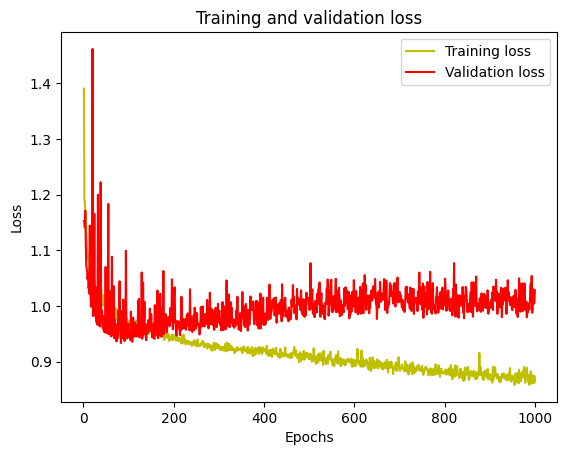

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

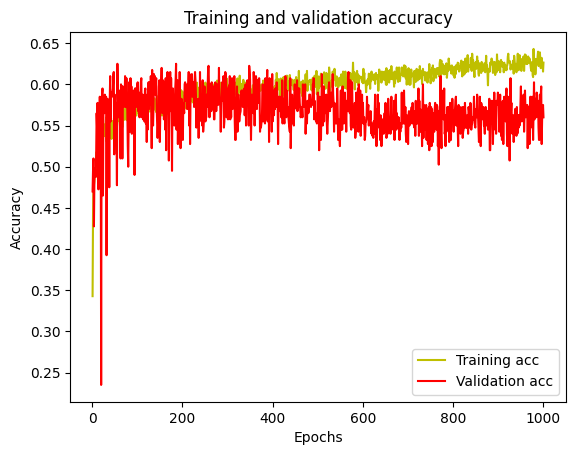

In [71]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [72]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        14
           2       0.60      0.82      0.69       169
           3       0.56      0.39      0.46       170
           4       0.38      0.45      0.41        40
           5       0.33      0.20      0.25         5

    accuracy                           0.56       400
   macro avg       0.31      0.31      0.30       400
weighted avg       0.53      0.56      0.53       400

[[  0   0   2   0   0   0]
 [  0   0   9   5   0   0]
 [  0   0 139  28   2   0]
 [  0   0  77  66  26   1]
 [  0   0   5  16  18   1]
 [  0   0   0   2   2   1]]


C:\Users\User\.anaconda\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\.anaconda\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\.anaconda\envs\deep\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
loss, accuracy = model.evaluate(X_test, y_test)
print("테스트 데이터 손실:", loss)
print("테스트 데이터 정확도:", accuracy)

13/13 [==============================] - 0s 1ms/step - loss: 1.0282 - accuracy: 0.5600
테스트 데이터 손실: 1.0281765460968018
테스트 데이터 정확도: 0.5600000023841858
